In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,GRU,SimpleRNN,Bidirectional,Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from keras.utils import np_utils

from sklearn.metrics import classification_report
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('/content/ecommerce.csv')
df.head()

,Unnamed: 0,label,text
0,14,Household,Indianara Motivational Square Synthetic Wood A...
1,24,Household,Indianara Motivational Square Synthetic Wood A...
2,35,Household,"SAF 'Ganesha' Framed Painting (Wood, 12 inch x..."
3,42,Household,Sehaz Artworks Home-Side-Shelf-WT-KeyHolder Wo...
4,43,Household,"SAF 'Ganesha' Framed Painting (Wood, 12 inch x..."


In [3]:
df.shape

(11719, 3)

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [6]:
df['label'].value_counts()

Books                     4186
Household                 3256
Clothing & Accessories    2433
Electronics               1844
Name: label, dtype: int64

In [7]:
df.duplicated().sum()

5135

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.head(2)

,label,text
0,Household,Indianara Motivational Square Synthetic Wood A...
2,Household,"SAF 'Ganesha' Framed Painting (Wood, 12 inch x..."


In [11]:
Books=" ".join(df[df['label']=='Books']['text'])
Household=" ".join(df[df['label']=='Household']['text'])
Clothing_Accessories=" ".join(df[df['label']=='Clothing & Accessories']['text'])
Electronics=" ".join(df[df['label']=='Electronics']['text'])

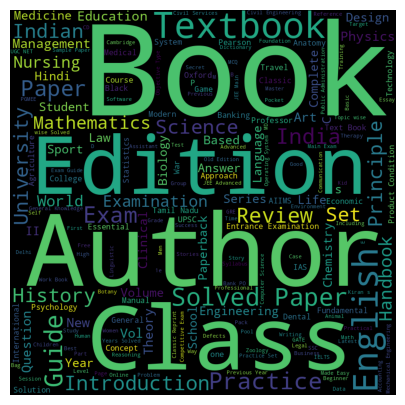

In [12]:
wc=WordCloud(width=800,height=800,background_color='black',min_font_size=10)
wc.generate(Books)

plt.figure(figsize=(7,5))
plt.imshow(wc)
plt.axis('off')
plt.show()


In [13]:
X=df['text']
Y=df['label']

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)

In [15]:
Y=np_utils.to_categorical(Y)

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [17]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_train)

In [18]:
vocabulary=tokenizer.index_word
vocab_length=len(vocabulary)
print(vocabulary)
print(vocab_length)

{1: 'and', 2: 'of', 3: 'for', 4: 'with', 5: 'the', 6: 'a', 7: 'cotton', 8: 'to', 9: 'in', 10: 'black', 11: 'is', 12: '2', 13: 'set', 14: '1', 15: '3', 16: 'pack', 17: 'this', 18: "women's", 19: "men's", 20: '5', 21: 'white', 22: '6', 23: '4', 24: 'fit', 25: 'size', 26: 'from', 27: 'by', 28: 'it', 29: 'your', 30: 'steel', 31: 'made', 32: 'on', 33: 'blue', 34: 'x', 35: 'shirt', 36: 'color', 37: 'book', 38: '100', 39: 'stainless', 40: 'inch', 41: '10', 42: 'regular', 43: 'all', 44: 'free', 45: 'product', 46: 'fabric', 47: 'you', 48: 'usb', 49: 'home', 50: 'about', 51: 'girls', 52: 'women', 53: 't', 54: 'cm', 55: 'author', 56: '8', 57: '12', 58: 'class', 59: 'colour', 60: 'high', 61: 'kids', 62: 'are', 63: 'new', 64: 'design', 65: 'long', 66: '7', 67: 'top', 68: 'shorts', 69: 'silver', 70: 'wear', 71: 'quality', 72: 'boys', 73: 'red', 74: 'cable', 75: "boys'", 76: 'amazonbasics', 77: 'look', 78: 'table', 79: 'casual', 80: 'brand', 81: '2018', 82: 'baby', 83: '0', 84: 'solid', 85: 'polo', 8

In [19]:
train_sequence=tokenizer.texts_to_sequences(X_train)
print(train_sequence)

[[6076, 6077, 6, 465, 32, 406, 628, 1, 1520, 286, 87, 3, 629, 3205, 443, 444, 242, 89, 539, 4, 2614, 1237, 4, 789, 6078], [6079, 1362, 445, 446, 268, 3206, 511, 318, 1363, 101], [512, 630, 34, 574, 139, 1905, 483, 6080, 172, 57, 3206, 387, 101, 4069, 4070, 351], [4071, 913, 342, 790, 1364, 6, 1365, 674, 970, 8, 377, 20, 631, 342, 3207, 281, 17, 11, 5, 1364, 6, 1365, 674, 970, 8, 342, 3207, 3208, 2615], [2616, 598, 971, 166, 224, 1051, 78, 4, 22, 2617, 49, 1, 575, 352, 3209, 118, 131], [6081, 18, 1689, 513, 363], [4072], [6082, 230, 6083, 4073, 1906], [4074, 2618, 13, 2, 12, 183, 599, 600, 447, 102, 3, 103, 1, 484, 6084, 1907, 47, 632, 1, 6085, 599, 423, 1052, 8, 675, 28], [791, 972, 914, 242, 81], [2240, 4075, 973, 424, 167, 974, 2240, 4075, 167, 1053, 1054, 974], [1908, 1690, 216, 193, 39, 30, 973, 601, 1366, 6086, 6087, 69, 973, 601, 1366, 751, 216, 4076, 600, 425, 1055, 6088, 4077, 6089, 426, 3, 4078, 6090, 6091], [4079, 27, 225, 19, 297, 269, 6092, 6093, 2241, 189], [5, 752, 378, 1

In [20]:
doc_length=[]
for doc in train_sequence:
  doc_length.append(len(doc))
print(doc_length)  

[25, 10, 16, 29, 17, 5, 1, 5, 26, 5, 12, 29, 10, 8, 2, 11, 35, 8, 2, 3, 15, 24, 34, 12, 2, 22, 5, 15, 24, 5, 8, 12, 16, 24, 13, 7, 22, 24, 18, 4, 7, 22, 17, 17, 12, 17, 17, 6, 30, 28, 8, 11, 22, 22, 8, 32, 14, 20, 11, 6, 15, 19, 73, 13, 30, 17, 15, 8, 28, 9, 29, 6, 3, 19, 30, 32, 3, 14, 26, 25, 20, 31, 6, 37, 13, 13, 27, 19, 34, 7, 8, 10, 5, 31, 11, 11, 6, 10, 5, 12, 6, 6, 15, 13, 15, 3, 18, 26, 4, 16, 23, 30, 14, 15, 22, 8, 2, 18, 7, 7, 7, 6, 26, 26, 6, 6, 16, 62, 21, 29, 13, 12, 25, 32, 5, 16, 22, 23, 25, 16, 5, 6, 4, 5, 14, 5, 9, 7, 16, 30, 15, 13, 13, 18, 5, 24, 5, 23, 6, 27, 16, 16, 17, 34, 8, 17, 12, 10, 28, 19, 11, 30, 4, 19, 14, 64, 10, 12, 22, 13, 24, 3, 9, 7, 8, 31, 14, 19, 18, 18, 34, 15, 17, 12, 3, 28, 19, 12, 27, 5, 14, 22, 16, 11, 7, 9, 2, 25, 13, 32, 4, 26, 9, 6, 23, 23, 25, 26, 23, 22, 12, 20, 7, 5, 34, 22, 32, 22, 26, 18, 13, 38, 5, 8, 22, 19, 15, 13, 24, 21, 8, 12, 26, 17, 19, 11, 15, 22, 32, 20, 15, 8, 6, 6, 29, 19, 19, 4, 6, 11, 24, 24, 28, 7, 57, 28, 10, 29, 22, 27

In [21]:
max(doc_length)

271

In [22]:
print(np.quantile(doc_length,0.95))
print(np.quantile(doc_length,0.99))

33.0
53.0


In [23]:
max_length=53

In [24]:
train_matrix=sequence.pad_sequences(train_sequence,maxlen=max_length)
print(train_matrix)

[[    0     0     0 ...     4   789  6078]
 [    0     0     0 ...   318  1363   101]
 [    0     0     0 ...  4069  4070   351]
 ...
 [    0     0     0 ...   847   504 11799]
 [    0     0     0 ...   395   309   196]
 [    0     0     0 ...   295  3483  2942]]


In [25]:
test_sequence=tokenizer.texts_to_sequences(X_test)
test_matrix=sequence.pad_sequences(test_sequence,maxlen=max_length)
print(test_matrix)

[[   0    0    0 ...  639  237  310]
 [   0    0    0 ...  744  729  539]
 [   0    0    0 ...    2  963  725]
 ...
 [   0    0    0 ... 2838   54 1724]
 [   0    0    0 ...    9    2  821]
 [   0    0    0 ...  121 3912   81]]


In [26]:
model=Sequential()
model.add(Embedding(input_dim=vocab_length+1,output_dim=100,input_length=max_length,
                mask_zero=True))
model.add(SimpleRNN(64))
model.add(Dense(units=32,activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=16,activation='tanh'))

model.add(Dense(units=4,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy')

In [27]:
model.fit(train_matrix,Y_train,epochs=10,batch_size=128)

Epoch 1/10
36/36 [==============================] - 5s 57ms/step - loss: 1.0289
Epoch 2/10
36/36 [==============================] - 2s 55ms/step - loss: 0.3410
Epoch 3/10
36/36 [==============================] - 2s 55ms/step - loss: 0.1452
Epoch 4/10
36/36 [==============================] - 2s 54ms/step - loss: 0.0734
Epoch 5/10
36/36 [==============================] - 3s 74ms/step - loss: 0.0420
Epoch 6/10
36/36 [==============================] - 2s 66ms/step - loss: 0.0316
Epoch 7/10
36/36 [==============================] - 2s 54ms/step - loss: 0.0241
Epoch 8/10
36/36 [==============================] - 2s 54ms/step - loss: 0.0163
Epoch 9/10
36/36 [==============================] - 2s 53ms/step - loss: 0.0105
Epoch 10/10
36/36 [==============================] - 2s 54ms/step - loss: 0.0077


In [28]:
Y_pred=model.predict(test_matrix)
Y_pred=np.where(Y_pred>0.5,1,0)
print(classification_report(Y_test,Y_pred))

62/62 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       707
           1       0.96      0.94      0.95       447
           2       0.90      0.85      0.88       316
           3       0.90      0.92      0.91       506

   micro avg       0.93      0.93      0.93      1976
   macro avg       0.93      0.92      0.92      1976
weighted avg       0.93      0.93      0.93      1976
 samples avg       0.93      0.93      0.93      1976



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
model=Sequential()
model.add(Embedding(input_dim=vocab_length+1,output_dim=100,input_length=max_length,
                mask_zero=True))
model.add(Bidirectional(SimpleRNN(64)))
model.add(Dense(units=32,activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=16,activation='tanh'))

model.add(Dense(units=4,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy')

In [44]:
model.fit(train_matrix,Y_train,epochs=10,batch_size=128)

Epoch 1/10
36/36 [==============================] - 8s 88ms/step - loss: 1.0731
Epoch 2/10
36/36 [==============================] - 3s 88ms/step - loss: 0.3875
Epoch 3/10
36/36 [==============================] - 4s 125ms/step - loss: 0.1240
Epoch 4/10
36/36 [==============================] - 4s 97ms/step - loss: 0.0500
Epoch 5/10
36/36 [==============================] - 3s 87ms/step - loss: 0.0262
Epoch 6/10
36/36 [==============================] - 3s 87ms/step - loss: 0.0173
Epoch 7/10
36/36 [==============================] - 5s 126ms/step - loss: 0.0127
Epoch 8/10
36/36 [==============================] - 3s 88ms/step - loss: 0.0100
Epoch 9/10
36/36 [==============================] - 3s 88ms/step - loss: 0.0078
Epoch 10/10
36/36 [==============================] - 3s 88ms/step - loss: 0.0065


In [45]:
Y_pred=model.predict(test_matrix)
Y_pred=np.where(Y_pred>0.5,1,0)
print(classification_report(Y_test,Y_pred))

62/62 [==============================] - 2s 20ms/step
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       707
           1       0.95      0.97      0.96       447
           2       0.95      0.82      0.88       316
           3       0.90      0.91      0.91       506

   micro avg       0.94      0.93      0.93      1976
   macro avg       0.94      0.92      0.93      1976
weighted avg       0.94      0.93      0.93      1976
 samples avg       0.93      0.93      0.93      1976



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
model=Sequential()
model.add(Embedding(input_dim=vocab_length+1,output_dim=100,input_length=max_length,
                mask_zero=True))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(64))
model.add(Dense(units=32,activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=16,activation='tanh'))

model.add(Dense(units=4,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy')

In [48]:
model.fit(train_matrix,Y_train,epochs=10,batch_size=128)

Epoch 1/10
36/36 [==============================] - 9s 138ms/step - loss: 1.0248
Epoch 2/10
36/36 [==============================] - 4s 112ms/step - loss: 0.2947
Epoch 3/10
36/36 [==============================] - 5s 132ms/step - loss: 0.1121
Epoch 4/10
36/36 [==============================] - 5s 127ms/step - loss: 0.0618
Epoch 5/10
36/36 [==============================] - 4s 112ms/step - loss: 0.0425
Epoch 6/10
36/36 [==============================] - 5s 141ms/step - loss: 0.0239
Epoch 7/10
36/36 [==============================] - 4s 121ms/step - loss: 0.0289
Epoch 8/10
36/36 [==============================] - 4s 114ms/step - loss: 0.0214
Epoch 9/10
36/36 [==============================] - 5s 150ms/step - loss: 0.0214
Epoch 10/10
36/36 [==============================] - 4s 113ms/step - loss: 0.0120


In [49]:
Y_pred=model.predict(test_matrix)
Y_pred=np.where(Y_pred>0.5,1,0)
print(classification_report(Y_test,Y_pred))

62/62 [==============================] - 2s 29ms/step
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       707
           1       0.96      0.92      0.94       447
           2       0.88      0.85      0.86       316
           3       0.91      0.89      0.90       506

   micro avg       0.92      0.91      0.92      1976
   macro avg       0.92      0.90      0.91      1976
weighted avg       0.92      0.91      0.92      1976
 samples avg       0.91      0.91      0.91      1976



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
model=Sequential()
model.add(Embedding(input_dim=vocab_length+1,output_dim=100,input_length=max_length,
                mask_zero=True))
model.add(LSTM(64))
model.add(Dense(units=32,activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=16,activation='tanh'))

model.add(Dense(units=4,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy')

In [53]:
model.fit(train_matrix,Y_train,epochs=10,batch_size=128)

Epoch 1/10
36/36 [==============================] - 8s 128ms/step - loss: 1.0926
Epoch 2/10
36/36 [==============================] - 7s 196ms/step - loss: 0.4138
Epoch 3/10
36/36 [==============================] - 5s 134ms/step - loss: 0.1789
Epoch 4/10
36/36 [==============================] - 6s 169ms/step - loss: 0.0756
Epoch 5/10
36/36 [==============================] - 5s 127ms/step - loss: 0.0424
Epoch 6/10
36/36 [==============================] - 5s 128ms/step - loss: 0.0343
Epoch 7/10
36/36 [==============================] - 6s 164ms/step - loss: 0.0310
Epoch 8/10
36/36 [==============================] - 5s 127ms/step - loss: 0.0184
Epoch 9/10
36/36 [==============================] - 6s 169ms/step - loss: 0.0207
Epoch 10/10
36/36 [==============================] - 5s 126ms/step - loss: 0.0235


In [54]:
Y_pred=model.predict(test_matrix)
Y_pred=np.where(Y_pred>0.5,1,0)
print(classification_report(Y_test,Y_pred))

62/62 [==============================] - 4s 27ms/step
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       707
           1       0.95      0.96      0.96       447
           2       0.79      0.89      0.84       316
           3       0.95      0.81      0.88       506

   micro avg       0.92      0.91      0.92      1976
   macro avg       0.91      0.91      0.91      1976
weighted avg       0.92      0.91      0.92      1976
 samples avg       0.91      0.91      0.91      1976



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
model=Sequential()
model.add(Embedding(input_dim=vocab_length+1,output_dim=100,input_length=max_length,
                mask_zero=True))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(units=32,activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=16,activation='tanh'))

model.add(Dense(units=4,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy')

In [56]:
model.fit(train_matrix,Y_train,epochs=10,batch_size=128)

Epoch 1/10
36/36 [==============================] - 16s 230ms/step - loss: 1.0878
Epoch 2/10
36/36 [==============================] - 10s 269ms/step - loss: 0.3087
Epoch 3/10
36/36 [==============================] - 10s 268ms/step - loss: 0.1176
Epoch 4/10
36/36 [==============================] - 8s 222ms/step - loss: 0.0641
Epoch 5/10
36/36 [==============================] - 10s 269ms/step - loss: 0.0398
Epoch 6/10
36/36 [==============================] - 10s 267ms/step - loss: 0.0314
Epoch 7/10
36/36 [==============================] - 8s 223ms/step - loss: 0.0219
Epoch 8/10
36/36 [==============================] - 10s 269ms/step - loss: 0.0206
Epoch 9/10
36/36 [==============================] - 10s 268ms/step - loss: 0.0144
Epoch 10/10
36/36 [==============================] - 8s 236ms/step - loss: 0.0129


In [57]:
Y_pred=model.predict(test_matrix)
Y_pred=np.where(Y_pred>0.5,1,0)
print(classification_report(Y_test,Y_pred))

62/62 [==============================] - 4s 22ms/step
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       707
           1       0.97      0.94      0.96       447
           2       0.91      0.84      0.88       316
           3       0.88      0.92      0.90       506

   micro avg       0.93      0.93      0.93      1976
   macro avg       0.93      0.92      0.92      1976
weighted avg       0.94      0.93      0.93      1976
 samples avg       0.93      0.93      0.93      1976



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
model=Sequential()
model.add(Embedding(input_dim=vocab_length+1,output_dim=100,input_length=max_length,
                mask_zero=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(units=32,activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=16,activation='tanh'))

model.add(Dense(units=4,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy')

In [59]:
model.fit(train_matrix,Y_train,epochs=10,batch_size=128)

Epoch 1/10
36/36 [==============================] - 24s 374ms/step - loss: 1.1073
Epoch 2/10
36/36 [==============================] - 13s 371ms/step - loss: 0.3006
Epoch 3/10
36/36 [==============================] - 13s 370ms/step - loss: 0.1061
Epoch 4/10
36/36 [==============================] - 13s 371ms/step - loss: 0.0584
Epoch 5/10
36/36 [==============================] - 13s 373ms/step - loss: 0.0398
Epoch 6/10
36/36 [==============================] - 13s 373ms/step - loss: 0.0285
Epoch 7/10
36/36 [==============================] - 13s 375ms/step - loss: 0.0275
Epoch 8/10
36/36 [==============================] - 14s 378ms/step - loss: 0.0237
Epoch 9/10
36/36 [==============================] - 13s 373ms/step - loss: 0.0290
Epoch 10/10
36/36 [==============================] - 13s 376ms/step - loss: 0.0212


In [60]:
Y_pred=model.predict(test_matrix)
Y_pred=np.where(Y_pred>0.5,1,0)
print(classification_report(Y_test,Y_pred))

62/62 [==============================] - 7s 54ms/step
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       707
           1       0.97      0.93      0.95       447
           2       0.94      0.81      0.87       316
           3       0.90      0.88      0.89       506

   micro avg       0.92      0.91      0.91      1976
   macro avg       0.92      0.90      0.91      1976
weighted avg       0.92      0.91      0.91      1976
 samples avg       0.91      0.91      0.91      1976



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
model=Sequential()
model.add(Embedding(input_dim=vocab_length+1,output_dim=100,input_length=max_length,
                mask_zero=True))
model.add(GRU(64))
model.add(Dense(units=32,activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=16,activation='tanh'))

model.add(Dense(units=4,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy')

In [63]:
model.fit(train_matrix,Y_train,epochs=10,batch_size=128)

Epoch 1/10
36/36 [==============================] - 8s 113ms/step - loss: 1.2447
Epoch 2/10
36/36 [==============================] - 5s 151ms/step - loss: 0.4873
Epoch 3/10
36/36 [==============================] - 4s 112ms/step - loss: 0.1143
Epoch 4/10
36/36 [==============================] - 4s 121ms/step - loss: 0.0508
Epoch 5/10
36/36 [==============================] - 5s 141ms/step - loss: 0.0251
Epoch 6/10
36/36 [==============================] - 4s 113ms/step - loss: 0.0175
Epoch 7/10
36/36 [==============================] - 5s 148ms/step - loss: 0.0121
Epoch 8/10
36/36 [==============================] - 6s 158ms/step - loss: 0.0091
Epoch 9/10
36/36 [==============================] - 4s 113ms/step - loss: 0.0063
Epoch 10/10
36/36 [==============================] - 6s 157ms/step - loss: 0.0052


In [64]:
Y_pred=model.predict(test_matrix)
Y_pred=np.where(Y_pred>0.5,1,0)
print(classification_report(Y_test,Y_pred))

62/62 [==============================] - 3s 12ms/step
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       707
           1       0.97      0.95      0.96       447
           2       0.92      0.88      0.90       316
           3       0.89      0.94      0.91       506

   micro avg       0.94      0.94      0.94      1976
   macro avg       0.94      0.93      0.93      1976
weighted avg       0.94      0.94      0.94      1976
 samples avg       0.94      0.94      0.94      1976



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
cv = CountVectorizer(stop_words="english")

In [31]:
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [32]:
X_train_cv

<4608x11397 sparse matrix of type '<class 'numpy.int64'>'
	with 50396 stored elements in Compressed Sparse Row format>

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
model = DecisionTreeClassifier()
model.fit(X_train_cv, Y_train)

DecisionTreeClassifier()

In [36]:
y_pred = model.predict(X_test_cv)

In [38]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       707
           1       0.96      0.94      0.95       447
           2       0.90      0.85      0.88       316
           3       0.90      0.92      0.91       506

   micro avg       0.93      0.93      0.93      1976
   macro avg       0.93      0.92      0.92      1976
weighted avg       0.93      0.93      0.93      1976
 samples avg       0.93      0.93      0.93      1976



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
